Use python to create a 2D CNN classifier model that can identify different images in CIFAR-10 dataset. This dataset
consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and
10000 test images. More details about this dataset can be found in: https://www.cs.toronto.edu/~kriz/cifar.html

1) Import all the necessary libraries, read the dataset from Keras libraries using cifar10.load_data(). Normalize all the train
and test images by dividing with 255.0. Employ one hot encoding for class labels in the train and test data. [15% marks]. 

In [1]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


In [3]:
# one hot encode target values
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [4]:
x_train_norm = x_train.astype('float32')
x_test_norm = x_test.astype('float32')
	# normalize to range 0-1
x_train_norm= x_train_norm / 255.0
x_test_norm = x_test_norm / 255.0

2) Build a 2D CNN classifier model using Sequential API having the following parameters: [25% marks].

* Three Conv2D layers
* Layer 1 has 32 neurons, input_shape= (32,32, 3)
* Layer 2 has 64 neurons
* Layer 3 has 128 neurons
* All Conv2D layers must use relu activation
* Use a kernel_size= (3,3) in all the Conv2D layers
* Three MaxPooling2D layers (pool_size=(2,2)), alternating with Conv2D layers
* Flatten layer is followed by a fully connected (Dense) layer with 128 neurons and relu activation
* This is followed by a Dropout with a value 0.4.
* The last Dense layer is the output layer which uses softmax activation

In [5]:
model = keras.models.Sequential() #sequential API
# Must define the input shape in the first layer of the neural network #kernel_size=2
model.add(keras.layers.Conv2D(32,kernel_size= (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))
model.add(keras.layers.Conv2D(64,kernel_size= (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))
model.add(keras.layers.Conv2D(128,kernel_size= (3,3) , activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

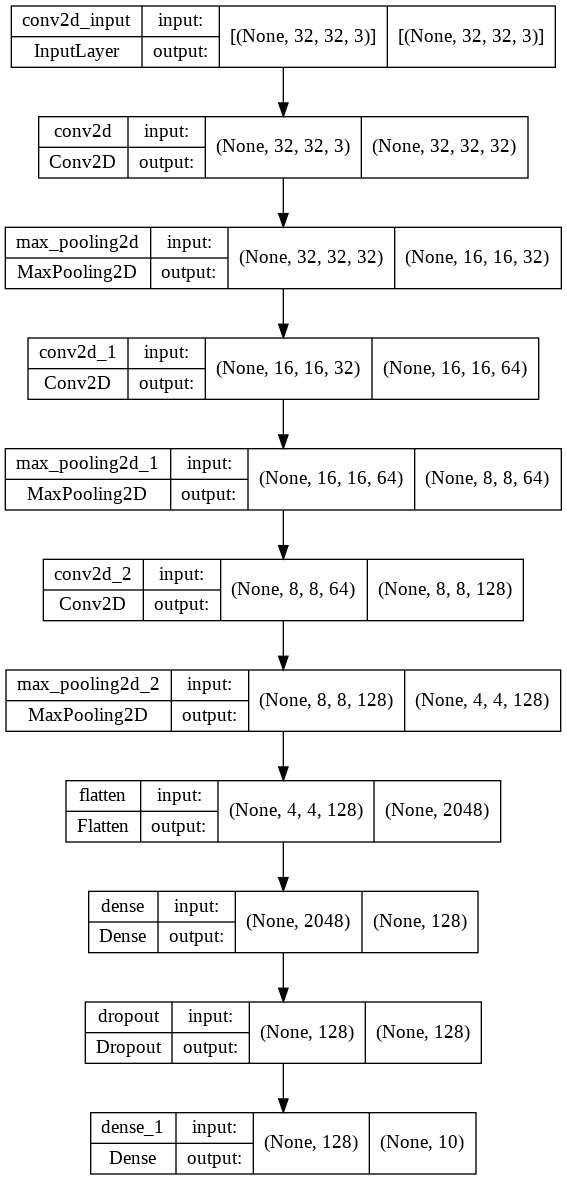

In [6]:
keras.utils.plot_model(model, " CIFAR-10.png", show_shapes=True)

3) Compile the model using categorical crossentropy loss and optimizer to be used is RMSprop. The learning rate value
must be 0.0001 and metric used is accuracy. [20% marks].


In [7]:
opt = keras.optimizers.RMSprop(lr=0.0001) #specify the learning rate for Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


4) Train the model with batch_size=128, epochs=100. Display the curves of loss and accuracy during training. Check if the
model is overfitting or underfitting and comment on that. Then save the model (in .h5 format) using model.save. [20%
marks]

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CIFAR_10.h5", save_best_only=True)
history= model.fit(x_train_norm,
         y_train,
         batch_size=128,
         epochs=100,
         validation_data=(x_test_norm, y_test),
         callbacks=[checkpoint_cb])

Epoch 1/100
391/391 [==============================] - 107s 270ms/step - loss: 1.9273 - accuracy: 0.3040 - val_loss: 1.6806 - val_accuracy: 0.4064
Epoch 2/100
391/391 [==============================] - 105s 268ms/step - loss: 1.6561 - accuracy: 0.4070 - val_loss: 1.5010 - val_accuracy: 0.4835
Epoch 3/100
391/391 [==============================] - 107s 274ms/step - loss: 1.5331 - accuracy: 0.4544 - val_loss: 1.3907 - val_accuracy: 0.5111
Epoch 4/100
391/391 [==============================] - 108s 276ms/step - loss: 1.4493 - accuracy: 0.4844 - val_loss: 1.3600 - val_accuracy: 0.5304
Epoch 5/100
391/391 [==============================] - 116s 296ms/step - loss: 1.3759 - accuracy: 0.5141 - val_loss: 1.2945 - val_accuracy: 0.5449
Epoch 6/100
391/391 [==============================] - 114s 292ms/step - loss: 1.3217 - accuracy: 0.5321 - val_loss: 1.2338 - val_accuracy: 0.5644
Epoch 7/100
391/391 [==============================] - 118s 302ms/step - loss: 1.2660 - accuracy: 0.5540 - val_loss: 1

In [9]:
model.save("CIFAR_10.h5") ## save the pre-trained model for later use
model.save_weights("CIFAR_weights.ckpt") ##you can also save weights only
#model.load_weights("CNN_weights.ckpt") # load weights only

Display the learning curves

In [10]:
history.params

{'epochs': 100, 'steps': 391, 'verbose': 1}

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

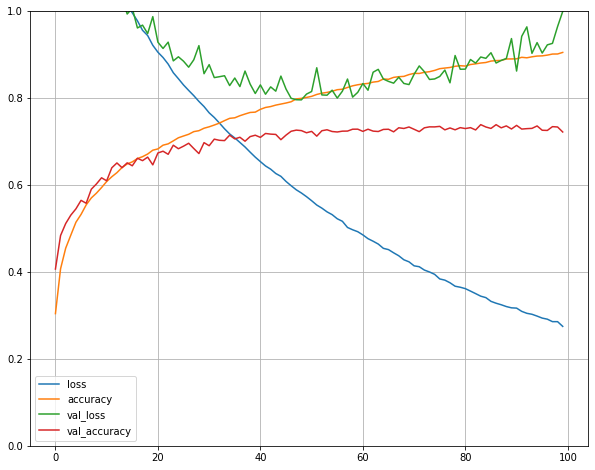

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 8)) ### plot the loss curves
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

5) Evaluate the model on test data using several evaluation metrics such as accuracy, precision, and recall. Make a
comparison of AUC values for each class depicted through a ROC graph. [20% marks].

Test Accuracy and loss for pre-trained model

In [21]:
score = model.evaluate(x_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9986655116081238
Test accuracy: 0.7215999960899353


In [23]:
# evaluate model
_, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))



> 72.160


In [46]:
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

pred_all = np.argmax(model.predict(x_test_norm),axis=-1)
pred_all
y_tst_org=np.argmax(y_test,axis=-1)

In [47]:
cm = confusion_matrix(y_tst_org, pred_all)
cm ###multi classification, multiple classes (0-9)

array([[762,  20,  28,  28,  21,  22,   8,   8,  61,  42],
       [ 10, 830,   7,  15,   6,  10,   8,   2,  24,  88],
       [ 66,   8, 477,  95,  84, 132,  78,  37,  10,  13],
       [ 12,   8,  24, 558,  47, 240,  64,  20,   9,  18],
       [ 10,   1,  29,  75, 669,  76,  63,  58,  10,   9],
       [ 10,   4,  10, 148,  34, 737,  18,  27,   7,   5],
       [  2,   3,  17,  68,  25,  49, 822,   5,   3,   6],
       [ 10,   3,  13,  39,  55, 126,   7, 730,   3,  14],
       [ 67,  37,   8,  22,   6,  15,   6,   2, 798,  39],
       [ 11,  63,   4,  29,   5,  18,   6,   8,  23, 833]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_tst_org, pred_all))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1000
           1       0.85      0.83      0.84      1000
           2       0.77      0.48      0.59      1000
           3       0.52      0.56      0.54      1000
           4       0.70      0.67      0.69      1000
           5       0.52      0.74      0.61      1000
           6       0.76      0.82      0.79      1000
           7       0.81      0.73      0.77      1000
           8       0.84      0.80      0.82      1000
           9       0.78      0.83      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



In [49]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, pred_all, average='weighted')))



Accuracy: 0.72

Micro Precision: 0.72
Micro Recall: 0.72
Micro F1-score: 0.72

Macro Precision: 0.74
Macro Recall: 0.72
Macro F1-score: 0.72

Weighted Precision: 0.74
Weighted Recall: 0.72
Weighted F1-score: 0.72


Text(0.5, 257.44, 'Predicted label')

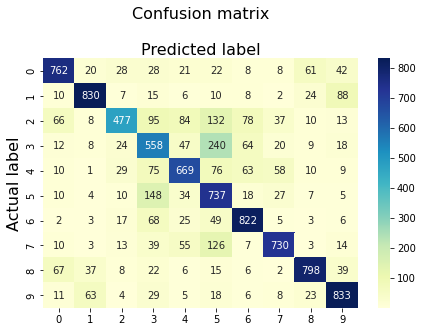

In [50]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cls_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes

fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

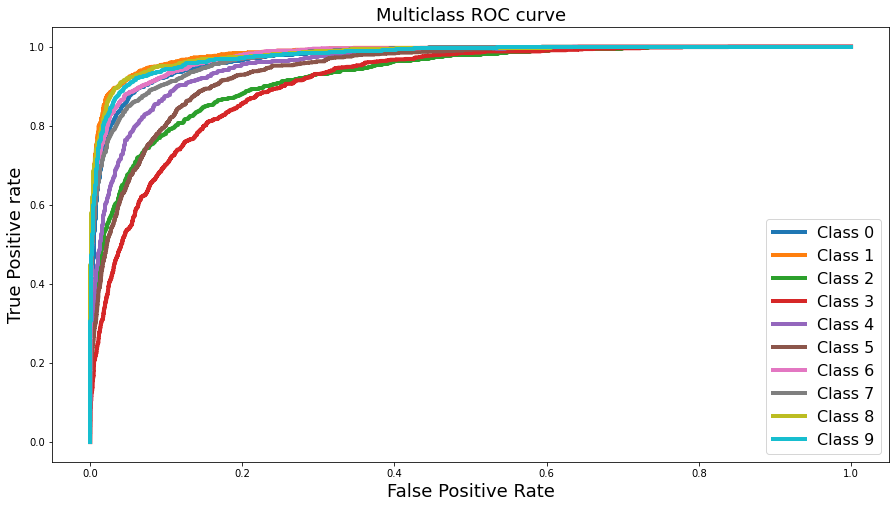

In [52]:
#ROC curve for individual classes
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict(x_test_norm) #predict the probabilities for each class

for i in range(n_class): # iterate through the classes 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i) #call the roc_curve function

#set the figure size
figure = plt.figure(figsize=(15, 8))
# plotting    
plt.plot(fpr[0], tpr[0],linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 4,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 4,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 4,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 4,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 4,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 4,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)
plt.legend(loc='best',fontsize = 16)

plt.show() #display the plot